In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df =pd.read_csv('Social_Network_Ads.csv')

In [5]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [6]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
197,15680243,Female,20,36000,0
59,15789109,Female,32,117000,0
384,15806901,Female,57,33000,1
108,15720943,Male,26,86000,0
39,15782806,Female,27,31000,0


In [7]:
df=df.iloc[:,2:]

In [8]:
df.sample(5)

,Age,EstimatedSalary,Purchased
233,49,86000,1
310,42,70000,0
255,52,90000,1
256,41,72000,0
378,41,87000,1


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train ,Y_test =train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)
X_train.shape ,X_test.shape

((280, 2), (120, 2))

In [10]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X_train)

X_train_scaled =scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [11]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [12]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [14]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


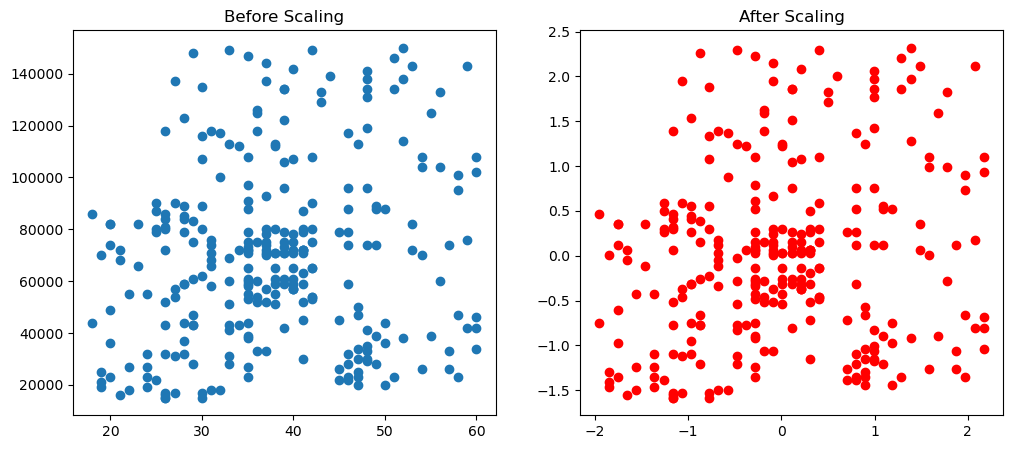

In [15]:
fig,(ax1 , ax2) =plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'] , X_train_scaled['EstimatedSalary'] , color='red')
ax2.set_title("After Scaling")
plt.show()

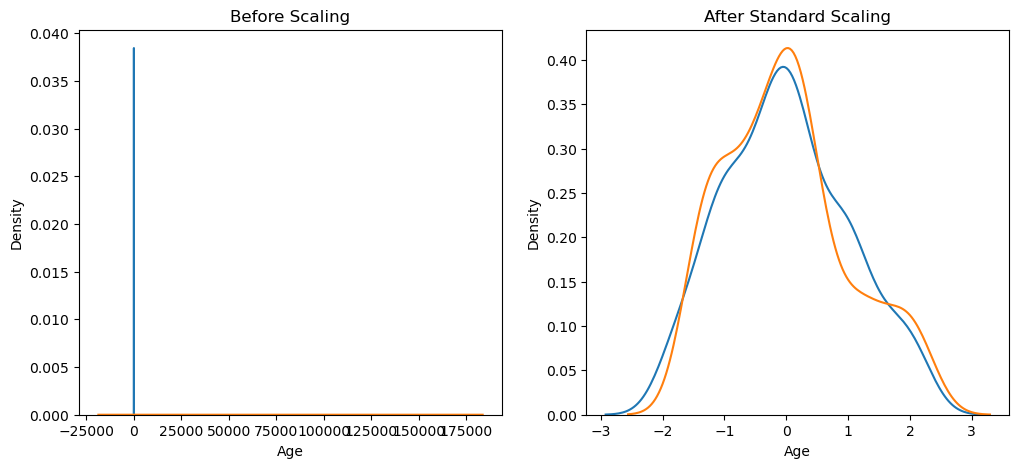

In [18]:
fig , (ax1,ax2) =plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)


ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

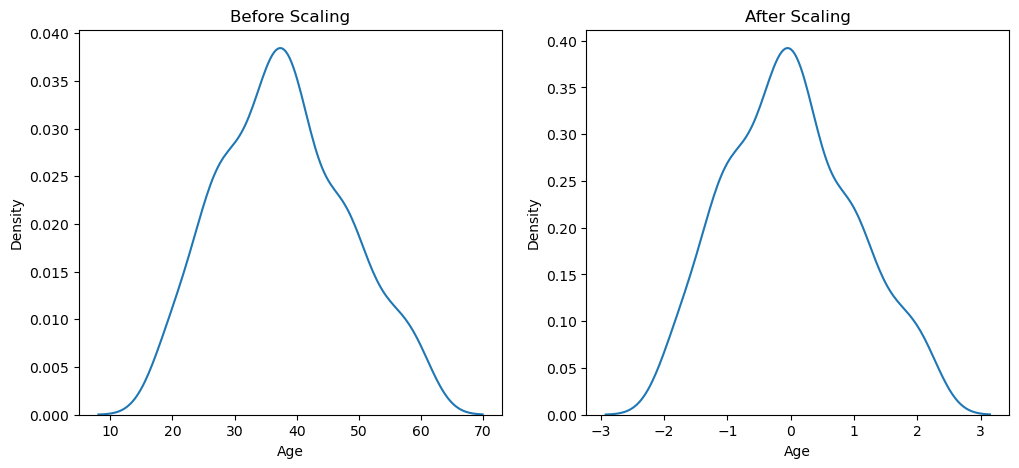

In [22]:
fig, (ax1,ax2) = plt.subplots(ncols= 2 , figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['Age'],ax=ax2)

plt.show()

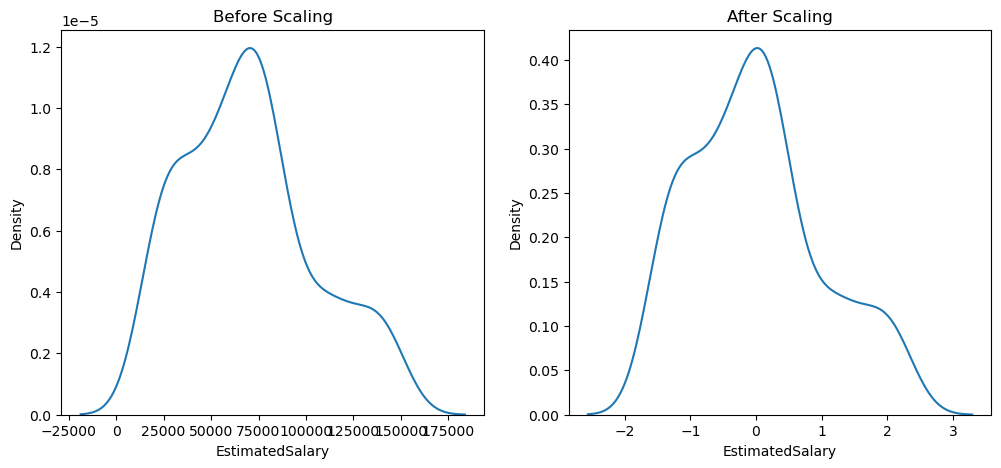

In [23]:
fig, (ax1,ax2) = plt.subplots(ncols= 2 , figsize=(12,5))

ax1.set_title('Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)

plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression 

In [25]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [28]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [44]:
y_pred =lr.predict(X_test)
y_pred_scaled= lr_scaled.predict(X_test_scaled)
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
print("Orignal",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Orignal 0.875
Scaled 0.8666666666666667


In [47]:
from sklearn.model_selection import cross_val_score
import numpy as np

original_scores = cross_val_score(lr, df.drop('Purchased', axis=1), df['Purchased'], cv=5)
scaled_scores = cross_val_score(lr_scaled, scaler.transform(df.drop('Purchased', axis=1)), df['Purchased'], cv=5)

print("Original Mean Accuracy (CV):", np.mean(original_scores))
print("Scaled Mean Accuracy (CV):", np.mean(scaled_scores))


Original Mean Accuracy (CV): 0.8275
Scaled Mean Accuracy (CV): 0.8275
